In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [216]:
data = pd.read_csv('Datasets/testset.csv')
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [217]:
df = data.copy()
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [218]:
df.shape

(100990, 20)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [220]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [221]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [222]:
df.duplicated().sum()

np.int64(0)

In [223]:
df.columns = df.columns.str.strip().str.lstrip('_')
df.columns.tolist()

['datetime_utc',
 'conds',
 'dewptm',
 'fog',
 'hail',
 'heatindexm',
 'hum',
 'precipm',
 'pressurem',
 'rain',
 'snow',
 'tempm',
 'thunder',
 'tornado',
 'vism',
 'wdird',
 'wdire',
 'wgustm',
 'windchillm',
 'wspdm']

In [224]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'], format='%Y%m%d-%H:%M')
print(f" Data range: {df['datetime_utc'].min()} to {df['datetime_utc'].max()}")

 Data range: 1996-11-01 11:00:00 to 2017-04-24 18:00:00


In [225]:
df.shape

(100990, 20)

In [226]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['conds', 'wdire']

In [227]:
for col in categorical_cols:
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Missing values: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"  Top 5 most frequent values:")
    print(df[col].value_counts().head(5).to_string())

  Unique values: 39
  Missing values: 72 (0.07%)
  Top 5 most frequent values:
conds
Haze               47602
Smoke              20760
Mist                9375
Clear               3129
Widespread Dust     2856
  Unique values: 17
  Missing values: 14755 (14.61%)
  Top 5 most frequent values:
wdire
North    19034
West     11888
WNW       7464
East      7233
NW        7117


In [228]:
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['dewptm',
 'fog',
 'hail',
 'heatindexm',
 'hum',
 'precipm',
 'pressurem',
 'rain',
 'snow',
 'tempm',
 'thunder',
 'tornado',
 'vism',
 'wdird',
 'wgustm',
 'windchillm',
 'wspdm']

In [229]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])   # convert to datetime if not already
df = df.set_index('datetime_utc')  
df.index                       # set it as index


DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=100990, freq=None)

In [230]:
df_2000_2001 = df.loc['2000':'2001']

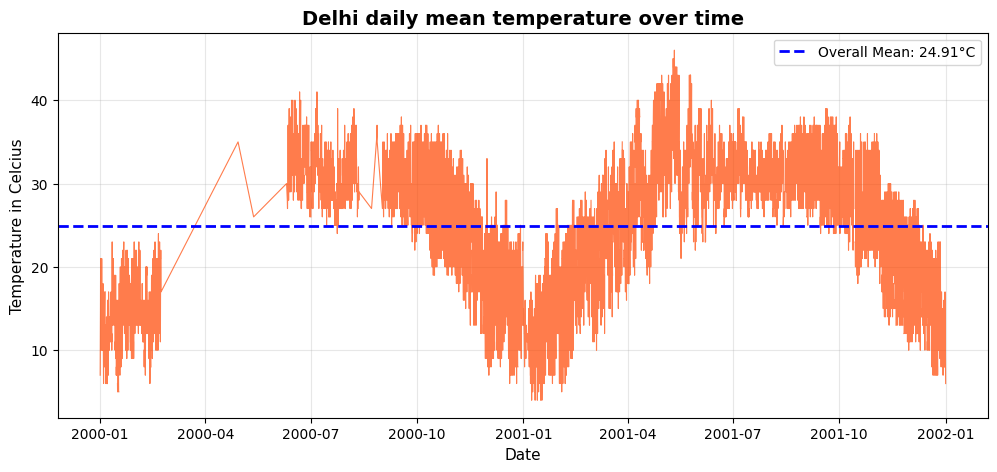

In [231]:
plt.figure(figsize=(12,5))

plt.plot(df_2000_2001.index,df_2000_2001['tempm'], linewidth=0.8, alpha=0.7, color='orangered')
plt.title('Delhi daily mean temperature over time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Temperature in Celcius', fontsize=11)
plt.grid(True, alpha=0.3)

#Add mean line
mean_temp = df_2000_2001['tempm'].mean()
plt.axhline(y=mean_temp, color='blue', linestyle='--', linewidth=2, label =f'Overall Mean: {mean_temp:.2f}°C' )

plt.legend(fontsize=10)
plt.show()

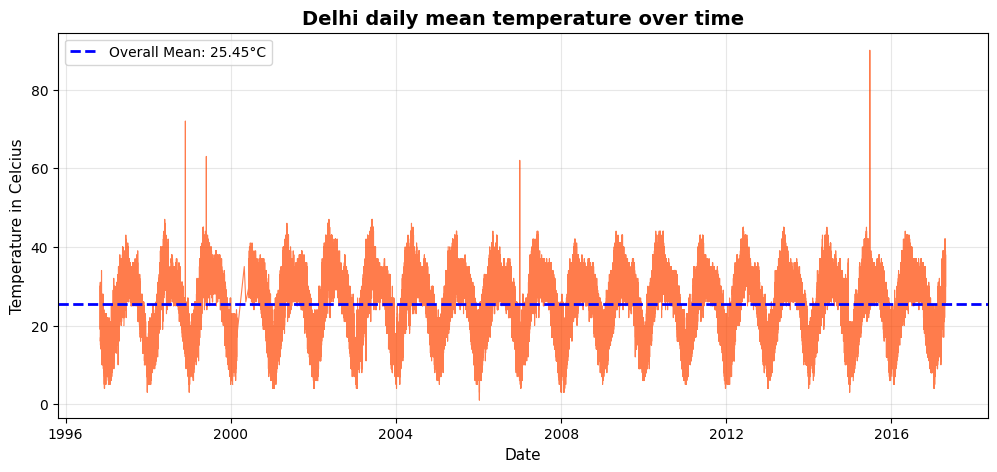

In [232]:
plt.figure(figsize=(12,5))

plt.plot(df.index,df['tempm'], linewidth=0.8, alpha=0.7, color='orangered')
plt.title('Delhi daily mean temperature over time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Temperature in Celcius', fontsize=11)
plt.grid(True, alpha=0.3)

#Add mean line
mean_temp = df['tempm'].mean()
plt.axhline(y=mean_temp, color='blue', linestyle='--', linewidth=2, label =f'Overall Mean: {mean_temp:.2f}°C' )

plt.legend(fontsize=10)
plt.show()

In [233]:
#Analyzing numerical columns
for col in numerical_cols:
    print(f"  Missing values: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"  Contains -9999: {(df[col] == -9999).sum()}")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")
    print(f"  Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")



  Missing values: 621 (0.61%)
  Contains -9999: 0
  Min: -24.00, Max: 75.00
  Mean: 15.74, Median: 15.00
  Missing values: 0 (0.00%)
  Contains -9999: 0
  Min: 0.00, Max: 1.00
  Mean: 0.07, Median: 0.00
  Missing values: 0 (0.00%)
  Contains -9999: 0
  Min: 0.00, Max: 1.00
  Mean: 0.00, Median: 0.00
  Missing values: 71835 (71.13%)
  Contains -9999: 0
  Min: 26.80, Max: 73.60
  Mean: 35.65, Median: 35.10
  Missing values: 757 (0.75%)
  Contains -9999: 0
  Min: 4.00, Max: 243.00
  Mean: 57.91, Median: 59.00
  Missing values: 100990 (100.00%)
  Contains -9999: 0
  Min: nan, Max: nan
  Mean: nan, Median: nan
  Missing values: 232 (0.23%)
  Contains -9999: 751
  Min: -9999.00, Max: 101061443.00
  Mean: 1932.33, Median: 1008.00
  Missing values: 0 (0.00%)
  Contains -9999: 0
  Min: 0.00, Max: 1.00
  Mean: 0.03, Median: 0.00
  Missing values: 0 (0.00%)
  Contains -9999: 0
  Min: 0.00, Max: 1.00
  Mean: 0.00, Median: 0.00
  Missing values: 673 (0.67%)
  Contains -9999: 0
  Min: 1.00, Max: 90.

In [235]:
# Replace -9999 with NaN for numerical columns
for col in numerical_cols:
    df[col] = df[col].replace(-9999, np.nan)
print(f"  ✓ Replaced -9999 placeholders with NaN in numerical columns")

# Drop precipm column (completely empty)
if 'precipm' in df.columns:
    df = df.drop('precipm', axis=1)
    numerical_cols.remove('precipm')
    print(f"  ✓ Removed 'precipm' column (no data)")

# Handle outliers in key numerical columns
print(f"\n  Handling outliers:")

# Temperature: reasonable range 0-50°C for Delhi
outliers_temp = ((df['tempm'] > 50) | (df['tempm'] < 0)).sum()
df.loc[(df['tempm'] > 50) | (df['tempm'] < 0), 'tempm'] = np.nan
print(f"    - tempm: {outliers_temp} outliers removed (range: 0-50°C)")

# Humidity: should be 0-100%
outliers_hum = ((df['hum'] > 100) | (df['hum'] < 0)).sum()
df.loc[(df['hum'] > 100) | (df['hum'] < 0), 'hum'] = np.nan
print(f"    - hum: {outliers_hum} outliers removed (range: 0-100%)")

# Pressure: typical range 980-1040 hPa
outliers_press = ((df['pressurem'] > 1040) | (df['pressurem'] < 980)).sum()
df.loc[(df['pressurem'] > 1040) | (df['pressurem'] < 980), 'pressurem'] = np.nan
print(f"    - pressurem: {outliers_press} outliers removed (range: 980-1040 hPa)")

# Wind speed: reasonable max 100 km/h
outliers_wind = ((df['wspdm'] > 100) | (df['wspdm'] < 0)).sum()
df.loc[(df['wspdm'] > 100) | (df['wspdm'] < 0), 'wspdm'] = np.nan
print(f"    - wspdm: {outliers_wind} outliers removed (range: 0-100 km/h)")

# Visibility: reasonable max 50 km
outliers_vis = (df['vism'] > 50).sum()
df.loc[df['vism'] > 50, 'vism'] = np.nan
print(f"    - vism: {outliers_vis} outliers removed (max: 50 km)")

# Dewpoint: should not exceed temperature significantly
outliers_dew = ((df['dewptm'] > 40) | (df['dewptm'] < -30)).sum()
df.loc[(df['dewptm'] > 40) | (df['dewptm'] < -30), 'dewptm'] = np.nan
print(f"    - dewptm: {outliers_dew} outliers removed (range: -30 to 40°C)")



  ✓ Replaced -9999 placeholders with NaN in numerical columns

  Handling outliers:
    - tempm: 0 outliers removed (range: 0-50°C)
    - hum: 0 outliers removed (range: 0-100%)
    - pressurem: 0 outliers removed (range: 980-1040 hPa)
    - wspdm: 0 outliers removed (range: 0-100 km/h)
    - vism: 0 outliers removed (max: 50 km)
    - dewptm: 0 outliers removed (range: -30 to 40°C)


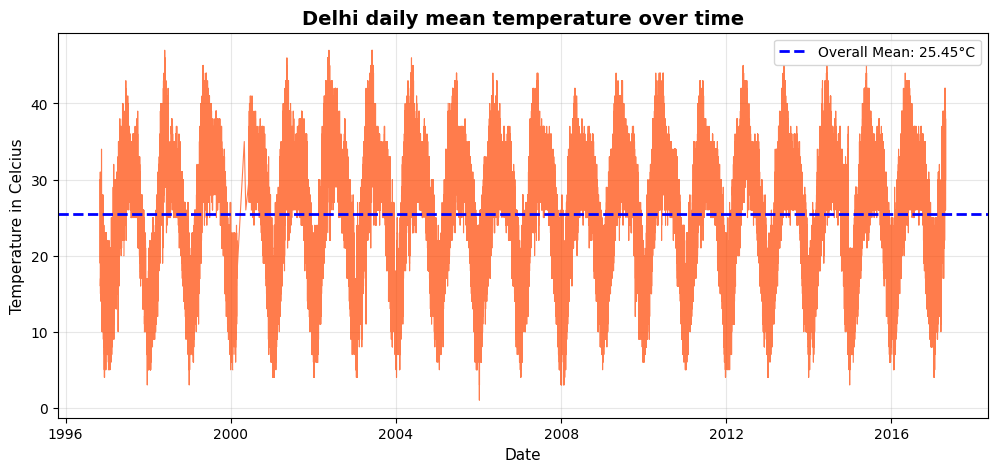

In [236]:
plt.figure(figsize=(12,5))

plt.plot(df.index, df['tempm'], linewidth=0.8, alpha=0.7, color='orangered')
plt.title('Delhi daily mean temperature over time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Temperature in Celcius', fontsize=11)
plt.grid(True, alpha=0.3)

#Add mean line
mean_temp = df['tempm'].mean()
plt.axhline(y=mean_temp, color='blue', linestyle='--', linewidth=2, label =f'Overall Mean: {mean_temp:.2f}°C' )

plt.legend(fontsize=10)
plt.show()

In [237]:
agg_dict = {}

print(f"\nAggregation strategy:")

# Numerical columns - use mean
for col in numerical_cols:
    if col in df.columns:
        agg_dict[col] = 'mean'



Aggregation strategy:


In [239]:
# Categorical columns - use mode (most frequent)
def get_mode(x):
    """Return mode, or NaN if all values are NaN"""
    mode_result = x.mode()
    return mode_result[0] if not mode_result.empty else np.nan

for col in categorical_cols:
    if col in df.columns:
        agg_dict[col] = get_mode


In [240]:
#Perform resampling of the data to daily from hourly
daily_df = df.resample('D').agg(agg_dict)
daily_df.shape

(7480, 18)

In [241]:
# anazyling relationship between categorical and numerical variables
if categorical_cols and 'conds' in daily_df.columns:
    print(f"\n Temperature by Weather Condition:")
    temp_by_cond = daily_df.groupby('conds')['tempm'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
    print(temp_by_cond.head(10))


 Temperature by Weather Condition:
                                   mean        std  count
conds                                                    
Blowing Sand                  34.134762   5.791495     25
Widespread Dust               33.188613   4.307383    182
Unknown                       33.154589   1.318566      2
Partly Cloudy                 32.218213   8.631986     27
Clear                         29.788315  10.502180     76
Haze                          28.113700   5.823964   4174
Scattered Clouds              27.071192  10.752946     29
Light Thunderstorms and Rain  26.000000        NaN      1
Light Drizzle                 23.621245   4.620455     13
Thunderstorms and Rain        22.839286   9.419672      2


In [243]:
daily_df.isnull().sum()

dewptm         144
fog            141
hail           141
heatindexm    5635
hum            144
pressurem      144
rain           141
snow           141
tempm          144
thunder        141
tornado        141
vism           144
wdird          250
wgustm        7125
windchillm    7300
wspdm          144
conds          141
wdire          250
dtype: int64

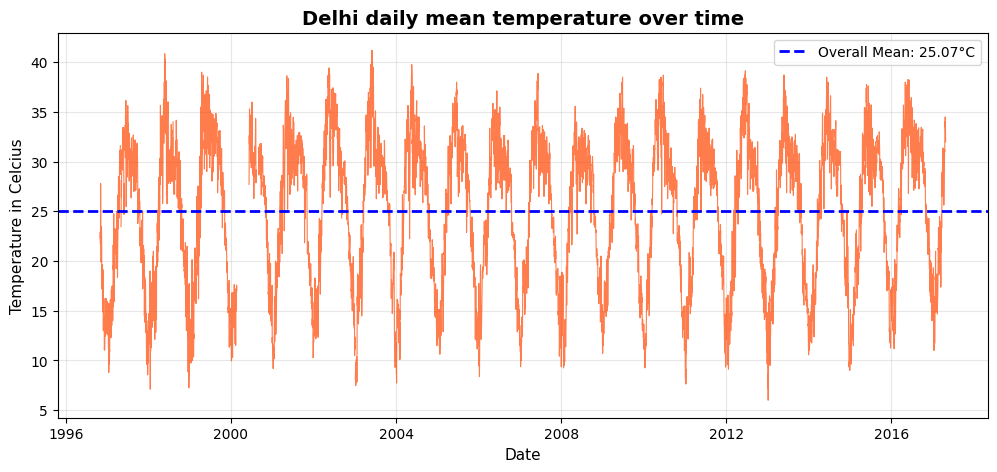

In [242]:
plt.figure(figsize=(12,5))

plt.plot(daily_df.index, daily_df['tempm'], linewidth=0.8, alpha=0.7, color='orangered')
plt.title('Delhi daily mean temperature over time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Temperature in Celcius', fontsize=11)
plt.grid(True, alpha=0.3)

#Add mean line
mean_temp = daily_df['tempm'].mean()
plt.axhline(y=mean_temp, color='blue', linestyle='--', linewidth=2, label =f'Overall Mean: {mean_temp:.2f}°C' )

plt.legend(fontsize=10)
plt.show()